In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [8]:
# loading the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

# target variable
target_variable = 'price'  

# drop rows with missing target variable values
data = data.dropna(subset=[target_variable])

# Identify and remove outliers
Q1 = data[target_variable].quantile(0.25)
Q3 = data[target_variable].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data[target_variable] >= lower_bound) & (data[target_variable] <= upper_bound)]

# separate features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# remove columns with any missing values
X = X.dropna(axis=1, how='any')

# one hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predictions for the test set
y_pred_rf = rf.predict(X_test)

# calculating r2 for random forest
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R²: {r2_rf:.4f}')


Random Forest R²: 0.6672


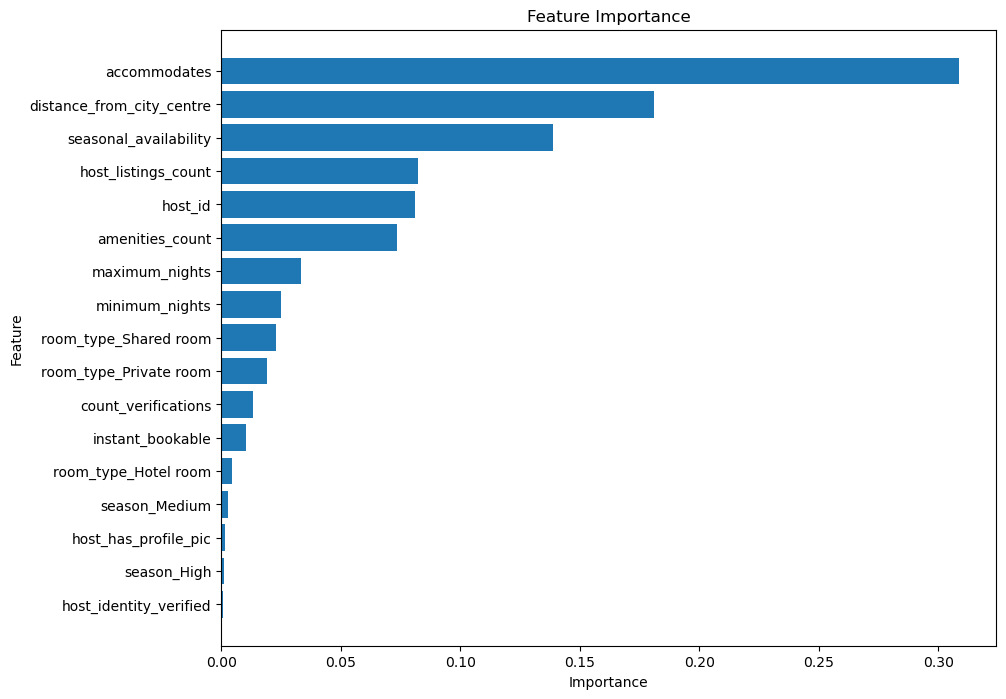

,Feature,Importance
4,accommodates,0.308782
11,distance_from_city_centre,0.181128
10,seasonal_availability,0.138807
1,host_listings_count,0.082429
0,host_id,0.081214
8,amenities_count,0.073526
6,maximum_nights,0.033260
5,minimum_nights,0.025103
14,room_type_Shared room,0.022727
12,room_type_Private room,0.019174


In [9]:
# display attribute importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# plotting the attributes importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

feature_importances.head(10)